### T-Test and Normality Test

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Load data set 

boat = sns.load_dataset('titanic')
boat.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
boat.isna()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
boat.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
boat.dropna(subset=['age'], axis=0,inplace=True)
boat.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           530
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
# now make dataframe of just 3 cols, age,sex and fare 

df = boat[["sex","age","fare"]]

In [7]:
df.shape

(714, 3)

In [8]:
df.head()

,sex,age,fare
0,male,22.0,7.2500
1,female,38.0,71.2833
2,female,26.0,7.9250
3,female,35.0,53.1000
4,male,35.0,8.0500


 T-test to compare the age of male and female

In [9]:
#1. import libraries
from scipy.stats import ttest_ind 

#2. subsets of male vs female
df_male = df[df['sex']== "male"]
df_female = df[df['sex']=='female']

#3. t-test type( unpaired/also called two sample, or independent t-test) 
# we chose unpaired because we have 2 different samples, Male and Female. t-test will comare male and female age

stat,p_value = ttest_ind(df_male['age'], df_female['age'])
print("stat=",stat ,"p=", p_value)

#4. conditional loop, differ or not 
if p_value>0.05:
    print("There is no significant difference")
else:
    print("There is significant difference") 

stat= 2.499206354920835 p= 0.012671296797013709
There is significant difference


### one-Sample t-test

copy the above code and use it with minor changes

In [10]:
#1. import libraries
from scipy.stats import ttest_1samp

#2. subsets of male vs female
df_male = df[df['sex']== "male"]
df_female = df[df['sex']=='female']

#3. t-test type( paired/also called one sample) 
# in one sample t-test one value must be compared with non-value, so we removed "df_female['age']"  and comapre with randome non-value 36

stat,p_value = ttest_1samp(df_male['age'], 36)
print("stat=",stat ,"p=", p_value)

#4. conditional loop, differ or not 
if p_value>0.05:
    print("There is no significant difference")
else:
    print("There is significant difference") 

stat= -7.646511009251602 p= 1.2523613407424712e-13
There is significant difference


here in above value of p is with e -13 that's why , result is significantly different

we just learned to apply t-test, thats why we didnt check normality.


But in order wise,the very first thing we do is to check Normality of data.


Now, lets do it in an order.

## Normal/Gaussian Distribution

<AxesSubplot:xlabel='age', ylabel='Count'>

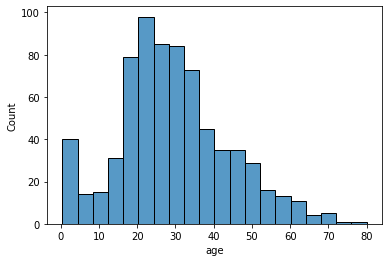

In [11]:
# Visual Test , to see normality visually

sns.histplot(boat['age'])

We saw age column's normality visually with histplot.

Now, to see it with shapiro wilk test, it tells the normality with p value

### Shapiro wilk test
this test is used to check normality of data

In [12]:
from scipy.stats import shapiro
stat, p = shapiro(boat['age'])
print('stat=', stat, 'p=', p)
if p>0.05:
    print("Probably Gaussian/normal")
else:
    print("Probably not gaussian")

stat= 0.9814548492431641 p= 7.322165629375377e-08
Probably not gaussian


from above applied shapiro test result, we see P-value is in e-08 that means its p < 0.05 

this test is applied on "age" col, but there are alot of NaN/null values in that col,


even if we remove those null value, still it wont effect the normality of data, result will still be same.

But, if dont remove the null val, instead fill the null values with mean or any other method, then it will effect the  normality result